# Airline Statistics and Cancellations Causes
## by Ghaida S. Altuwaijri

## Investigation Overview

Exploring US flights of 2008 and answering on:-

- Is there is Any relation between Flight Distance and Cancelled Flights?
- Which cancellation reason is most common?

- Is there is Any relation between Flight Distance and Cancelled Flights?

- What is the trend of each Carrier from day to day? Which day has the most flight cancellations? Is there a lot of variation in any of these?


## Dataset Overview


The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed. To make sure not overwhelmed by the size of the data.

The data is separated by year. We decided to explore only the flights on 2018 because it was the nearest year that contained a full data files.

I'll probably be using many of the variables in the data set like Month, DayofMonth, DayOfWeek, UniqueCarrier, Distance, Cancelled, CancellationCode. Others like delay related features, fligth number and taxi times don't seem like they'll be cery useful for me.

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2008.csv')
df2 = pd.read_csv('carriers.csv')

In [10]:
df.replace(np.nan, 0, inplace=True)

In [11]:
# rename the Code and Description columns in carriers table to UniqueCarrier and CarrierDescription
df2.columns = ['UniqueCarrier', 'CarrierDescription']
df = pd.merge(df, df2, on=['UniqueCarrier'], how='left')

#Remove some discription from the "US Airways Inc" carrier name
df['CarrierDescription'].unique()
df['CarrierDescription'] = df['CarrierDescription'].replace({'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)': 'US Airways Inc.'})

In [14]:
#this function will rename x,y axis and chart title. We can re-use this function since we will be doing a lot of plots.

def chart_labels(x_label,y_label,title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What is the total percentage of the cancelled flights?

Firstly, this chart shows that 2.70% of the flights on 2018 were cancelled.

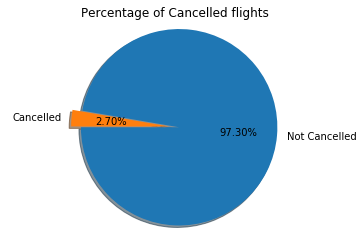

In [15]:
# what is the rate of cancelled flights?
labels = 'Not Cancelled', 'Cancelled'
explode = (0.1, 0)  # explode 1st slice
plt.pie(df.Cancelled.value_counts(), explode=explode, shadow=True, labels=labels, autopct='%.2f%%', startangle=180);
plt.title("Percentage of Cancelled flights", y=0.98, fontsize=12);
plt.axis('equal');

## Which cancellation reason is most common?

This chart shows that carrier is the most reason for canceling the flights, and security doesn't effect the cancellation that much!

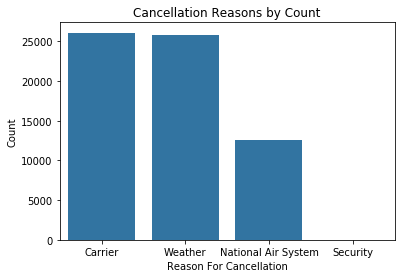

In [16]:
#Getting distribution using Seaborn bar plot 

#Define Plot
base_color=sb.color_palette()[0]
g=sb.countplot(data=df,x='CancellationCode',color=base_color,order=['A','B','C','D'])
chart_labels('Reason For Cancellation','Count','Cancellation Reasons by Count')
g.set_xticklabels(['Carrier','Weather','National Air System','Security']);

## Is there is Any relation between Flight Distance and Cancelled Flights?

these two charts show clearly that there is opposite relation between the flight distance and cancelled flights, Day 6 has the largest number of cancellation counts, in the opposite, the distances mean on day 6 was on the peak in the second chart.


## Is there is Any relation between Flight Distance and Cancelled Flights?

these two charts show clearly that there is opposite relation between the flight distance and cancelled flights, Day 6 has the largest number of cancellation counts, in the opposite, the distances mean on day 6 was on the peak in the second chart.


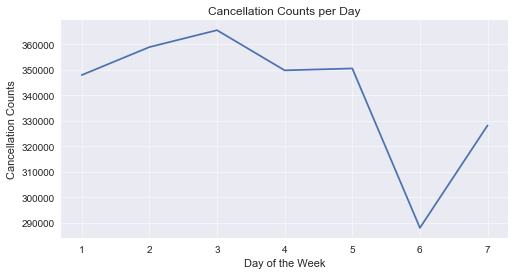

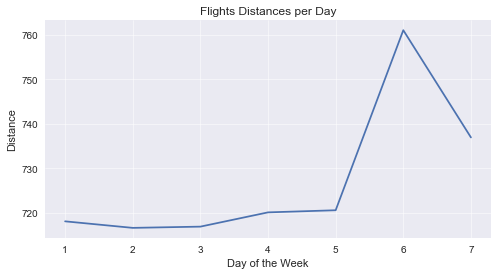

In [18]:
# plot the relation between week days and Cancelled Flights.
plt.figure(figsize=(8,4))
df.groupby('DayOfWeek')['Cancelled'].count().plot()
chart_labels('Day of the Week','Cancellation Counts','Cancellation Counts per Day')
plt.grid(b=True, linewidth=0.5);
plt.style.use('seaborn')

# plot the relation between week days and Flight Distance.
plt.figure(figsize=(8,4))
df.groupby('DayOfWeek')['Distance'].mean().plot()
chart_labels('Day of the Week','Distance','Flights Distances per Day')
plt.grid(b=True, linewidth=0.5);
plt.style.use('seaborn')

## What is the trend of each Carrier from day to day? Which day has the most flight cancellations? Is there a lot of variation in any of these?

This headmap takes every day of the week vs. carriers names with a defferent colors for cancellation counts. What jumped out was Hawaiian Airlines Inc and Aloha Airlines Inc who experienced virtually less than 10000 cancelled flight on 2008. Southwest Airlines Co. seems to experience high cancellation rate throughout the week on Average. In general, day6 recorded the highest flights cancellation rate for all airlines companies.

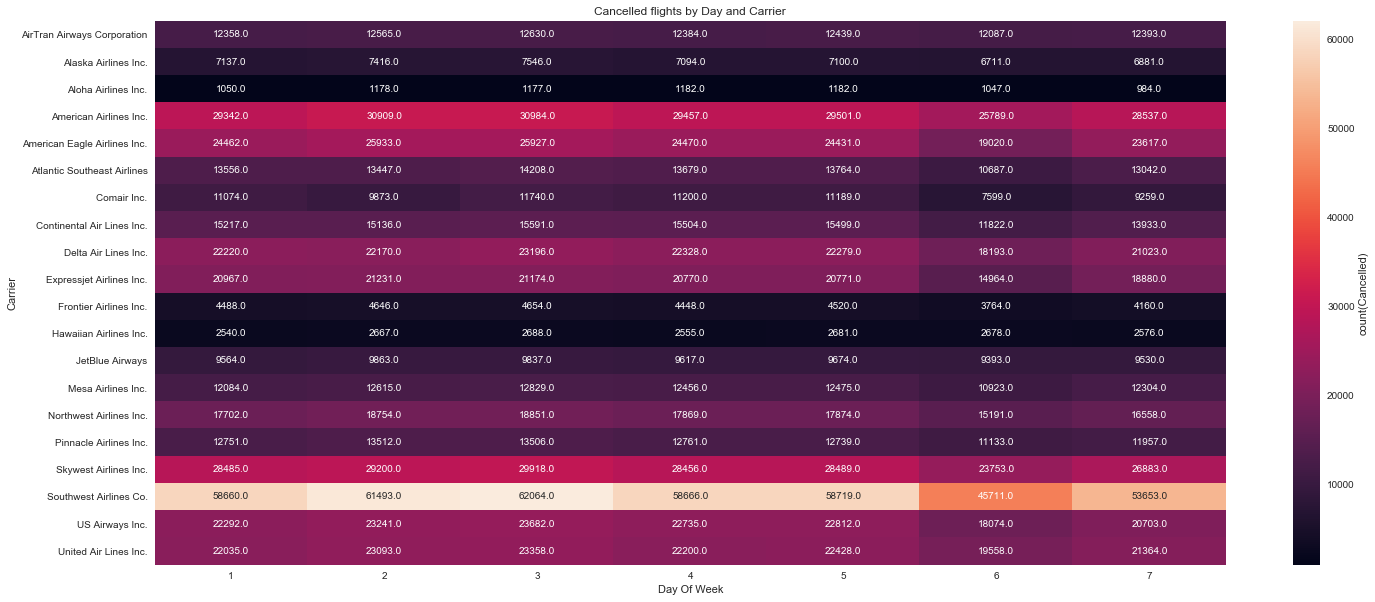

In [21]:
cancelled_df = df.groupby(['DayOfWeek', 'CarrierDescription']).count()['Cancelled']
cancelled_df = cancelled_df.reset_index(name = 'Cancelled')
cancelled_df = cancelled_df.pivot(index = 'CarrierDescription', columns = 'DayOfWeek',
                            values = 'Cancelled')
# figsize in inches
fig, ax = plt.subplots(figsize=(24,10))         
sb.heatmap(cancelled_df, annot = True, fmt = '.001f',
           cbar_kws = {'label' : 'count(Cancelled)'}, ax=ax);

chart_labels('Day Of Week','Carrier','Cancelled flights by Day and Carrier')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!